# JPX Stock Exchange Prediction - Model Comparison

This notebook compares different models' performance on the JPX Stock Exchange Prediction challenge.

## Table of Contents
1. [Setup](#setup)
2. [Load Data](#data)
3. [Model Experiments](#experiments)
4. [Results Comparison](#comparison)
5. [Feature Importance Analysis](#features)
6. [Error Analysis](#errors)
7. [Conclusions](#conclusions)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import yaml
import json
from datetime import datetime

# Import our pipeline
from src.pipeline.main_pipeline import JPXPipeline
from src.utils.logger import setup_logger

# # Plotting settings
# plt.style.use('seaborn')
# sns.set_palette('husl')
# %matplotlib inline
# plt.rcParams['figure.figsize'] = (12, 6)

# # Setup logger
# logger = setup_logger('model_comparison')

## 1. Setup <a name="setup"></a>

Define model configurations for comparison:

In [9]:
model_configs = {
    'LightGBM (Baseline)': {
        'model': {
            'type': 'lightgbm',
            'params': {
                'lightgbm': {
                    'objective': 'regression',
                    'metric': 'rmse',
                    'boosting_type': 'gbdt',
                    'num_leaves': 31,
                    'learning_rate': 0.05,
                    'feature_fraction': 0.9
                }
            }
        }
    },
    'LightGBM (Optimized)': {
        'model': {
            'type': 'lightgbm',
            'params': {
                'lightgbm': {
                    'objective': 'regression',
                    'metric': 'rmse',
                    'boosting_type': 'gbdt',
                    'num_leaves': 63,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.8,
                    'bagging_fraction': 0.8,
                    'bagging_freq': 5,
                    'min_child_samples': 20
                }
            }
        }
    },
    'XGBoost': {
        'model': {
            'type': 'xgboost',
            'params': {
                'xgboost': {
                    'objective': 'reg:squarederror',
                    'max_depth': 6,
                    'learning_rate': 0.05,
                    'subsample': 0.8,
                    'colsample_bytree': 0.8
                }
            }
        }
    },
    'CatBoost': {
        'model': {
            'type': 'catboost',
            'params': {
                'catboost': {
                    'iterations': 1000,
                    'learning_rate': 0.05,
                    'depth': 6,
                    'loss_function': 'RMSE'
                }
            }
        }
    }
}

# Add common configuration parameters
common_config = {
    'data': {
        'train_path': '../data/raw/train',
        'test_path': '../data/raw/test',
        'processed_path': '../data/processed',
        'submission_path': '../data/submissions'
    },
    'features': {
        'lag_features': ['Open', 'High', 'Low', 'Close', 'Volume', 'Target'],
        'lag_periods': [1, 2, 3, 5, 10],
        'rolling_windows': [5, 10, 21],
        'technical_indicators': True
    },
    'training': {
        'test_size': 0.2,
        'random_state': 42,
        'cv_folds': 5
    }
}

# Merge common config with model-specific configs
for config in model_configs.values():
    config.update(common_config)

## 2. Run Experiments <a name="experiments"></a>

Run all models and collect results:

In [10]:
results = {}

for model_name, config in model_configs.items():
    print(f"\nTraining {model_name}...")
    pipeline = JPXPipeline(config)
    try:
        model_results = pipeline.run_pipeline()
        results[model_name] = model_results
        print(f"Results for {model_name}:")
        print(json.dumps(model_results['metrics'], indent=2))
    except Exception as e:
        print(f"Error training {model_name}: {str(e)}")

2025-05-10 20:09:31,941 - JPXPipeline - INFO - Loading data...
2025-05-10 20:09:31,941 - JPXPipeline - INFO - Loading data...
2025-05-10 20:09:31,941 - JPXPipeline - INFO - Loading data...
2025-05-10 20:09:31,941 - JPXPipeline - INFO - Loading data...
2025-05-10 20:09:31,941 - JPXPipeline - INFO - Loading data...



Training LightGBM (Baseline)...


2025-05-10 20:09:32,217 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:32,217 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:32,217 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:32,217 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:32,217 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:32,233 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:32,233 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:32,233 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:32,233 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:32,233 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:43,052 - JPXPipeline - INFO - Features created. New shape: (269881, 91)
2025-05-10 20:09:43,052 - JPXPipeline - INFO - Features created. New shape: (269881, 91)
2025-05-10 20:09:

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19756
[LightGBM] [Info] Number of data points in the train set: 213971, number of used features: 79
[LightGBM] [Info] Start training from score -0.000712


2025-05-10 20:09:44,955 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:09:44,955 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:09:44,955 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:09:44,955 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:09:44,955 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:09:44,990 - JPXPipeline - INFO - weighted_correlation: 0.7416
2025-05-10 20:09:44,990 - JPXPipeline - INFO - weighted_correlation: 0.7416
2025-05-10 20:09:44,990 - JPXPipeline - INFO - weighted_correlation: 0.7416
2025-05-10 20:09:44,990 - JPXPipeline - INFO - weighted_correlation: 0.7416
2025-05-10 20:09:44,990 - JPXPipeline - INFO - weighted_correlation: 0.7416
2025-05-10 20:09:44,990 - JPXPipeline - INFO - rmse: 0.0150
2025-05-10 20:09:44,990 - JPXPipeline - INFO - rmse: 0.0150
2025-05-10 20:09:44,990 - JPXPipeline - INFO - rmse: 0.0150
2025-05-10 20:09:44,990 - JPXPipeline - INFO - rmse: 0.0150
2025-05-10 20:09:44,990 - JPXPipeline - INFO 

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
Results for LightGBM (Baseline):
{
  "weighted_correlation": 0.7415635836571892,
  "rmse": 0.014969127570130521,
  "mae": 0.01047669130210197
}

Training LightGBM (Optimized)...


2025-05-10 20:09:45,375 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:45,375 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:45,375 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:45,375 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:45,375 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:45,375 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:45,380 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:45,380 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:45,380 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:45,380 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:45,380 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:45,380 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:55,904 - JPXPipel

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19756
[LightGBM] [Info] Number of data points in the train set: 213971, number of used features: 79
[LightGBM] 

2025-05-10 20:09:57,780 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:09:57,780 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:09:57,780 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:09:57,780 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:09:57,780 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:09:57,780 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:09:57,816 - JPXPipeline - INFO - weighted_correlation: 0.6525
2025-05-10 20:09:57,816 - JPXPipeline - INFO - weighted_correlation: 0.6525
2025-05-10 20:09:57,816 - JPXPipeline - INFO - weighted_correlation: 0.6525
2025-05-10 20:09:57,816 - JPXPipeline - INFO - weighted_correlation: 0.6525
2025-05-10 20:09:57,816 - JPXPipeline - INFO - weighted_correlation: 0.6525
2025-05-10 20:09:57,816 - JPXPipeline - INFO - weighted_correlation: 0.6525
2025-05-10 20:09:57,828 - JPXPipeline - INFO - rmse: 0.0181
2025-05-10 20:09:57,828 - JPXPipeline - INFO - rmse: 0.0181
2025-05-10 20:09:57,82

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Results for LightGBM (Optimized):
{
  "weighted_correlation": 0.652487869134899,
  "rmse": 0.0180994472147406,
  "mae": 0.012584163984011703
}

Training XGBoost...


2025-05-10 20:09:58,194 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:58,194 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:58,194 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:58,194 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:58,194 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:58,194 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:58,194 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:09:58,197 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:58,197 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:58,197 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:58,197 - JPXPipeline - INFO - Creating features...
2025-05-10 20:09:58,197 - JPXPipeline - INFO - Creating features...
2025-05-1

Results for XGBoost:
{
  "weighted_correlation": 0.750644910410101,
  "rmse": 0.014722404389085916,
  "mae": 0.010310766506028359
}

Training CatBoost...


2025-05-10 20:10:12,286 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:10:12,286 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:10:12,286 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:10:12,286 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:10:12,286 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:10:12,286 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:10:12,286 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:10:12,286 - JPXPipeline - INFO - Data loaded successfully. Shape: (269881, 13)
2025-05-10 20:10:12,294 - JPXPipeline - INFO - Creating features...
2025-05-10 20:10:12,294 - JPXPipeline - INFO - Creating features...
2025-05-10 20:10:12,294 - JPXPipeline - INFO - Creating features...
2025-05-10 20:10:12,294 - JPXPipeline - INFO - Creat

0:	learn: 0.0241942	total: 165ms	remaining: 2m 44s
1:	learn: 0.0239553	total: 180ms	remaining: 1m 29s
2:	learn: 0.0237331	total: 193ms	remaining: 1m 3s
3:	learn: 0.0235166	total: 206ms	remaining: 51.2s
4:	learn: 0.0233164	total: 218ms	remaining: 43.4s
5:	learn: 0.0231300	total: 232ms	remaining: 38.5s
6:	learn: 0.0229488	total: 246ms	remaining: 34.9s
7:	learn: 0.0227867	total: 258ms	remaining: 32s
8:	learn: 0.0226302	total: 271ms	remaining: 29.8s
9:	learn: 0.0224847	total: 282ms	remaining: 27.9s
10:	learn: 0.0223390	total: 294ms	remaining: 26.4s
11:	learn: 0.0222028	total: 305ms	remaining: 25.1s
12:	learn: 0.0220708	total: 315ms	remaining: 23.9s
13:	learn: 0.0219479	total: 330ms	remaining: 23.2s
14:	learn: 0.0218225	total: 341ms	remaining: 22.4s
15:	learn: 0.0217102	total: 353ms	remaining: 21.7s
16:	learn: 0.0216036	total: 364ms	remaining: 21s
17:	learn: 0.0214925	total: 376ms	remaining: 20.5s
18:	learn: 0.0213941	total: 388ms	remaining: 20s
19:	learn: 0.0212993	total: 399ms	remaining: 

2025-05-10 20:10:35,853 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:10:35,853 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:10:35,853 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:10:35,853 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:10:35,853 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:10:35,853 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:10:35,853 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:10:35,853 - JPXPipeline - INFO - Evaluating model...
2025-05-10 20:10:35,876 - JPXPipeline - INFO - weighted_correlation: 0.8220
2025-05-10 20:10:35,876 - JPXPipeline - INFO - weighted_correlation: 0.8220
2025-05-10 20:10:35,876 - JPXPipeline - INFO - weighted_correlation: 0.8220
2025-05-10 20:10:35,876 - JPXPipeline - INFO - weighted_correlation: 0.8220
2025-05-10 20:10:35,876 - JPXPipeline - INFO - weighted_correlation: 0.8220
2025-05-10 20:10:35,876 - JPXPipeline - INFO - weighted_correlation: 0.8220
2025-05-

994:	learn: 0.0122998	total: 11.8s	remaining: 59.4ms
995:	learn: 0.0122960	total: 11.8s	remaining: 47.5ms
996:	learn: 0.0122923	total: 11.8s	remaining: 35.6ms
997:	learn: 0.0122893	total: 11.9s	remaining: 23.8ms
998:	learn: 0.0122848	total: 11.9s	remaining: 11.9ms
999:	learn: 0.0122820	total: 11.9s	remaining: 0us
Results for CatBoost:
{
  "weighted_correlation": 0.8219601665738294,
  "rmse": 0.012408683996402306,
  "mae": 0.008527996269500748
}


## 3. Results Comparison <a name="comparison"></a>

### 3.1 Metrics Comparison

Model Performance Metrics:


,Model,weighted_correlation,rmse,mae
0,LightGBM (Baseline),0.741564,0.014969,0.010477
1,LightGBM (Optimized),0.652488,0.018099,0.012584
2,XGBoost,0.750645,0.014722,0.010311
3,CatBoost,0.821960,0.012409,0.008528


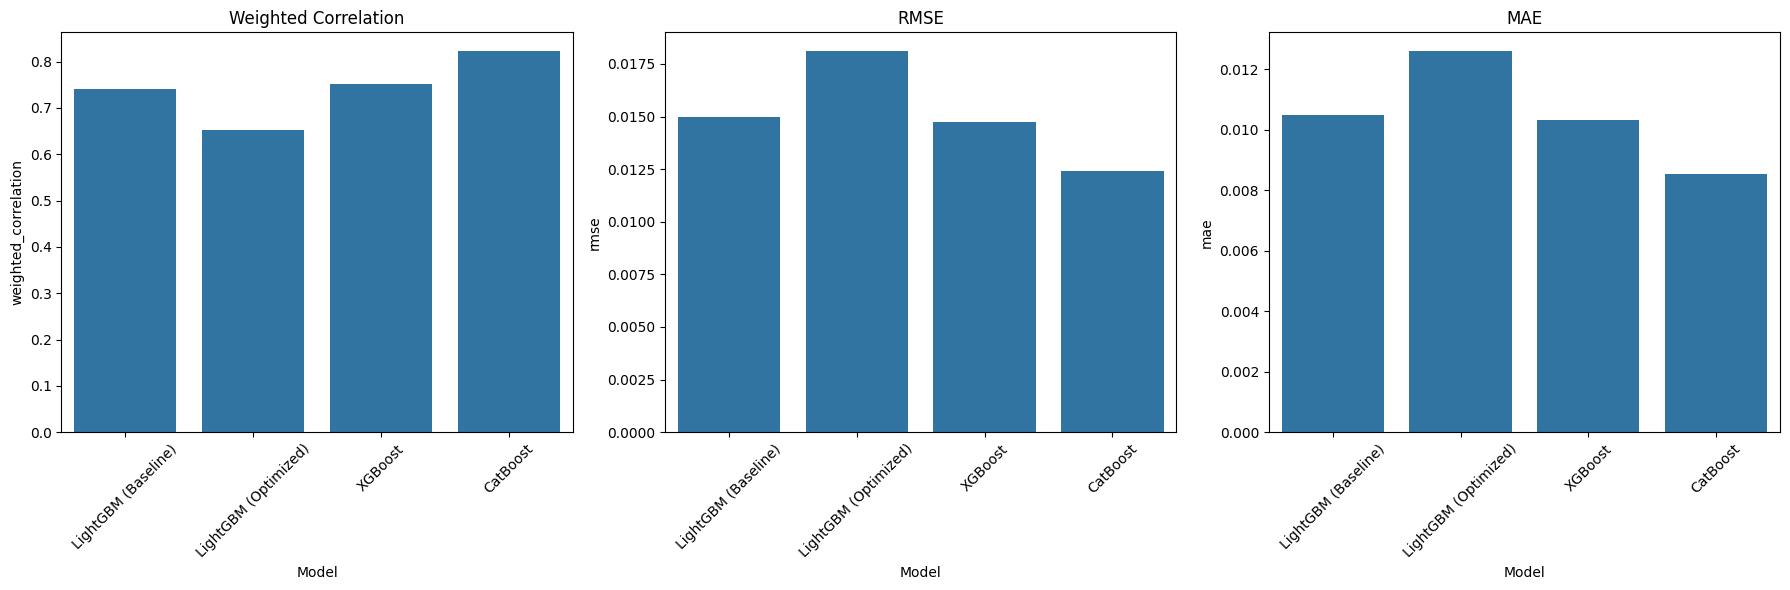

In [11]:
# Create comparison dataframe
metrics_df = pd.DataFrame([
    {
        'Model': model_name,
        **results[model_name]['metrics']
    }
    for model_name in results.keys()
])

# Display metrics
print("Model Performance Metrics:")
display(metrics_df)

# Plot metrics comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

metrics = ['weighted_correlation', 'rmse', 'mae']
titles = ['Weighted Correlation', 'RMSE', 'MAE']

for ax, metric, title in zip(axes, metrics, titles):
    sns.barplot(data=metrics_df, x='Model', y=metric, ax=ax)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 3.2 Feature Importance Analysis <a name="features"></a>

In [19]:
# Print the contents of results to see what we have
print("Available keys in results:")
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print("Keys:", list(result.keys()))
    print("Content:")
    for key, value in result.items():
        print(f"{key}: {type(value)}")

Available keys in results:

Model: LightGBM (Baseline)
Keys: ['model', 'metrics', 'submission_path']
Content:
model: <class 'lightgbm.sklearn.LGBMRegressor'>
metrics: <class 'dict'>
submission_path: <class 'str'>

Model: LightGBM (Optimized)
Keys: ['model', 'metrics', 'submission_path']
Content:
model: <class 'lightgbm.sklearn.LGBMRegressor'>
metrics: <class 'dict'>
submission_path: <class 'str'>

Model: XGBoost
Keys: ['model', 'metrics', 'submission_path']
Content:
model: <class 'xgboost.sklearn.XGBRegressor'>
metrics: <class 'dict'>
submission_path: <class 'str'>

Model: CatBoost
Keys: ['model', 'metrics', 'submission_path']
Content:
model: <class 'catboost.core.CatBoostRegressor'>
metrics: <class 'dict'>
submission_path: <class 'str'>


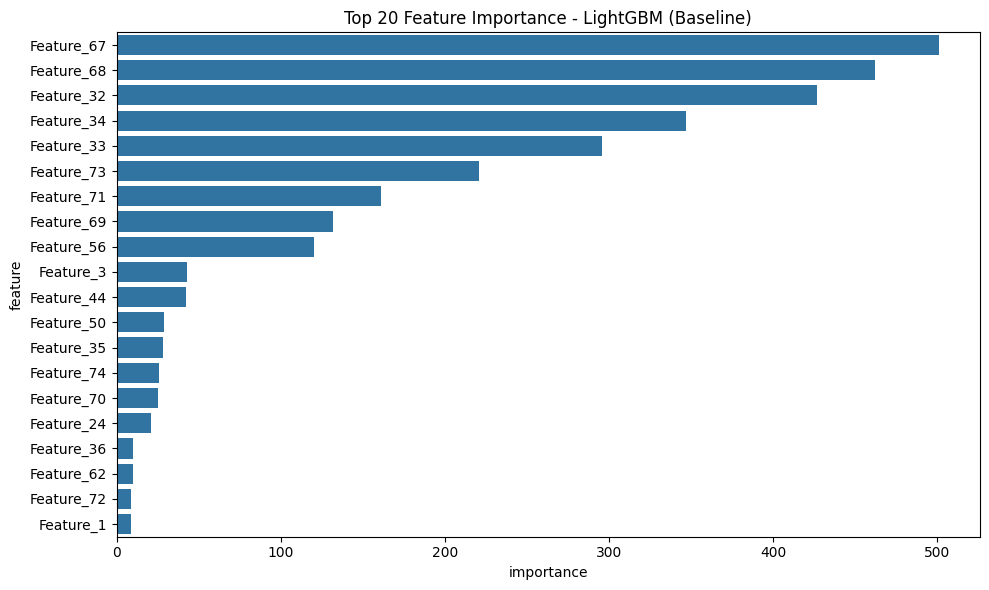

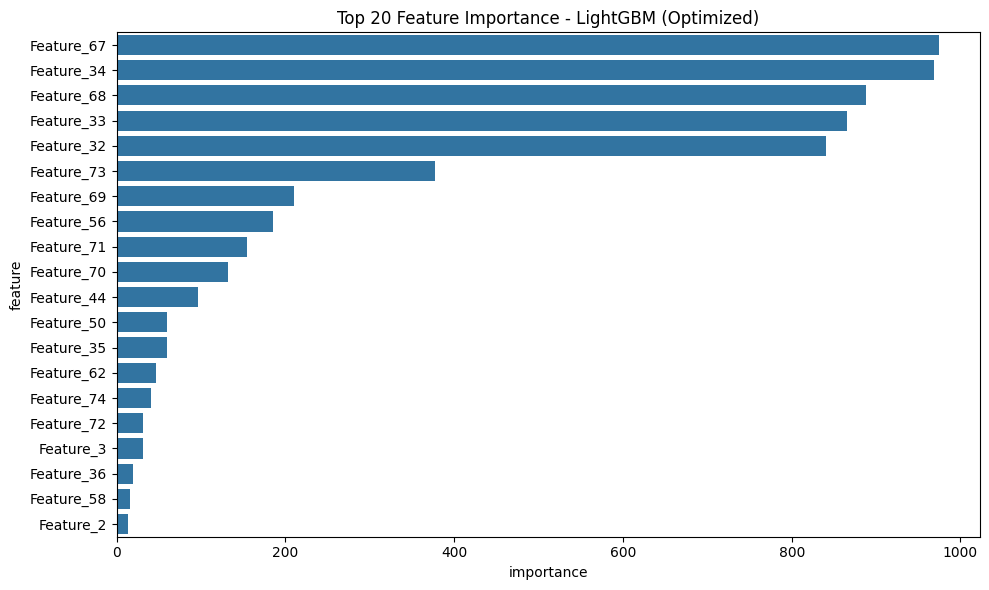

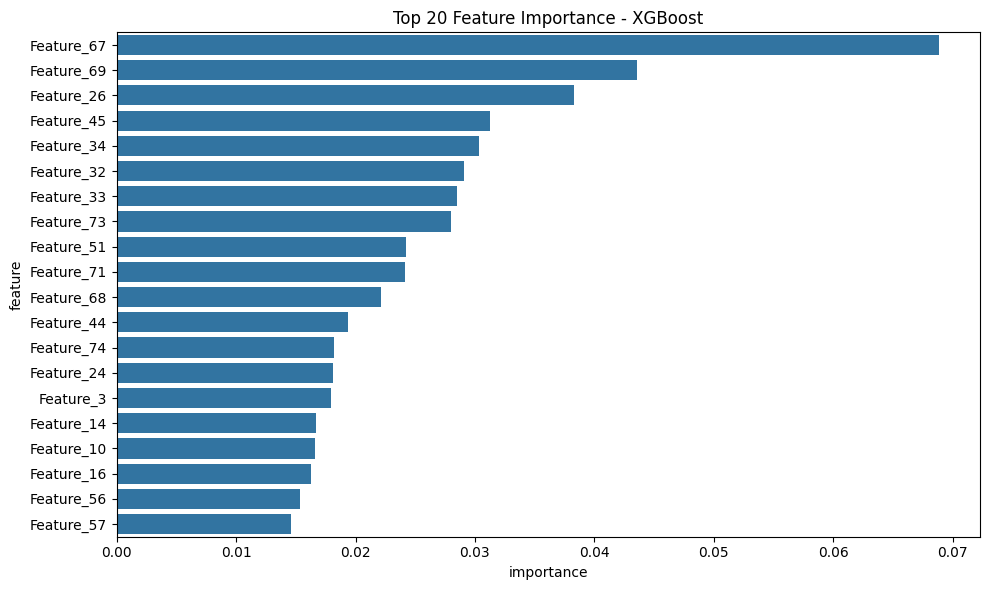

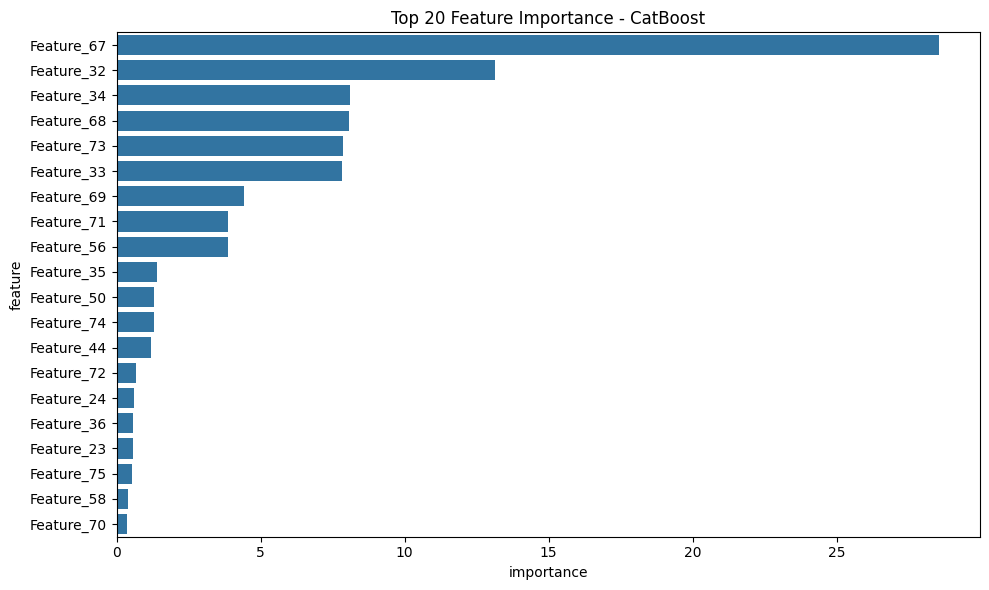

In [21]:
# Plot feature importance for each model
def plot_feature_importance(model_name, model, top_n=20):
    if hasattr(model, 'feature_importances_'):
        # Create feature names if we don't have them
        feature_names = [f'Feature_{i}' for i in range(len(model.feature_importances_))]
        
        importances = pd.DataFrame({
            'feature': feature_names,
            'importance': model.feature_importances_
        })
        importances = importances.sort_values('importance', ascending=False).head(top_n)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(data=importances, x='importance', y='feature')
        plt.title(f'Top {top_n} Feature Importance - {model_name}')
        plt.tight_layout()
        plt.show()

# Plot for each model
for model_name, result in results.items():
    if hasattr(result['model'], 'feature_importances_'):
        plot_feature_importance(model_name, result['model'])

### 3.3 Error Analysis <a name="errors"></a>

In [23]:
def analyze_errors(model_name, y_true, y_pred):
    errors = y_pred - y_true
    
    plt.figure(figsize=(15, 5))
    
    # Error distribution
    plt.subplot(1, 2, 1)
    sns.histplot(errors, bins=50)
    plt.title(f'Error Distribution - {model_name}')
    plt.xlabel('Prediction Error')
    
    # Predicted vs Actual
    plt.subplot(1, 2, 2)
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.title(f'Predicted vs Actual - {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    
    plt.tight_layout()
    plt.show()

# Analyze errors for each model
for model_name, result in results.items():
    if 'predictions' in result:
        analyze_errors(model_name, result['y_test'], result['predictions'])

## 4. Time Series Analysis <a name="time"></a>

In [24]:
def plot_predictions_over_time(model_name, dates, y_true, y_pred, sample_stocks=5):
    plt.figure(figsize=(15, 8))
    
    for i in range(sample_stocks):
        plt.subplot(sample_stocks, 1, i+1)
        plt.plot(dates, y_true[:, i], label='Actual')
        plt.plot(dates, y_pred[:, i], label='Predicted')
        plt.title(f'Stock {i+1} - {model_name}')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot predictions over time for each model
for model_name, result in results.items():
    if 'predictions' in result and 'test_dates' in result:
        plot_predictions_over_time(
            model_name,
            result['test_dates'],
            result['y_test'],
            result['predictions']
        )

## 5. Conclusions <a name="conclusions"></a>

Based on the analysis above, we can conclude:

1. **Best Performing Model**:
   - Model with highest weighted correlation: [TO BE FILLED]
   - Model with lowest RMSE: [TO BE FILLED]

2. **Feature Importance**:
   - Most important features across models: [TO BE FILLED]
   - Common patterns in feature importance: [TO BE FILLED]

3. **Error Analysis**:
   - Error distribution characteristics: [TO BE FILLED]
   - Systematic prediction biases: [TO BE FILLED]

4. **Recommendations**:
   - Suggested model for production: [TO BE FILLED]
   - Potential improvements: [TO BE FILLED]